<a href="https://colab.research.google.com/github/vominhhuy13101999/cnn_vgg16_cat-dog/blob/main/CNN_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip "/content/train.zip" -d "/content/train"
!unzip "/content/test.zip" -d "/content/test"

Streaming output truncated to the last 5000 lines.
  inflating: /content/test/test1/5499.jpg  
  inflating: /content/test/test1/55.jpg  
  inflating: /content/test/test1/550.jpg  
  inflating: /content/test/test1/5500.jpg  
  inflating: /content/test/test1/5501.jpg  
  inflating: /content/test/test1/5502.jpg  
  inflating: /content/test/test1/5503.jpg  
  inflating: /content/test/test1/5504.jpg  
  inflating: /content/test/test1/5505.jpg  
  inflating: /content/test/test1/5506.jpg  
  inflating: /content/test/test1/5507.jpg  
  inflating: /content/test/test1/5508.jpg  
  inflating: /content/test/test1/5509.jpg  
  inflating: /content/test/test1/551.jpg  
  inflating: /content/test/test1/5510.jpg  
  inflating: /content/test/test1/5511.jpg  
  inflating: /content/test/test1/5512.jpg  
  inflating: /content/test/test1/5513.jpg  
  inflating: /content/test/test1/5514.jpg  
  inflating: /content/test/test1/5515.jpg  
  inflating: /content/test/test1/5516.jpg  
  inflating: /content/test/te

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import itertools
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
os.chdir('train')

In [6]:
ls

sample_data/  test/  test.zip  train/  train.zip  valid/


In [ ]:
cd ..

/content


In [5]:
import shutil
import glob

In [3]:
if os.path.isdir('train/cat') is False:
    os.makedirs('train/cat')
    os.makedirs('train/dog')
    os.makedirs('valid/cat')
    os.makedirs('valid/dog')
    os.makedirs('test/cat')
    os.makedirs('test/dog')

In [8]:
cd ..

/content


In [9]:

os.chdir('train')
cat=[]
dog=[]
cat_val=[]
dog_val=[]

#valid
for i in random.sample(glob.glob('*'), 360):
    if i[:3]=='cat':
        cat_val.append(i)
        shutil.move(i, '../valid/cat')   
    else :
        dog_val.append(i)
        shutil.move(i, '../valid/dog')   

#train
for i in glob.glob('cat*'):
    cat.append(i)
    shutil.move(i, 'cat')      
for i in glob.glob('dog*'):
    dog.append(i)
    shutil.move(i, 'dog')

os.chdir('../')

print(len(cat)) #1201
print(len(dog)) #1202

1013
1030


In [32]:
cd /content


/content


In [26]:
for i in random.sample(glob.glob('*'), 360):
  print(type(i[:3]))
  break

<class 'str'>


In [ ]:
cd train/cat

/content/train/cat


In [33]:
ls

sample_data/  test/  test.zip  train/  train.zip  valid/


In [66]:

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,rescale=1.0/255.0).flow_from_directory(directory="train", target_size=(224,224), classes=['cat', 'dog'], batch_size=64)

Found 2041 images belonging to 2 classes.


In [11]:
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,rescale=1.0/255.0).flow_from_directory(directory="valid", target_size=(224,224), classes=['cat', 'dog'], batch_size=64)

Found 360 images belonging to 2 classes.


In [12]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,rescale=1.0/255.0).flow_from_directory(directory="test", target_size=(256,256), classes=['test1'], batch_size=10, shuffle=False)

Found 12500 images belonging to 1 classes.


In [57]:
train_batches = ImageDataGenerator(rescale=1.0/255).flow_from_directory(directory="train", target_size=(224,224), classes=['cat', 'dog'])

Found 2041 images belonging to 2 classes.


In [13]:
print(len(train_batches)) #32
print(len(valid_batches)) #6

32
6


In [44]:
train_batches[0][0].shape

(64, 224, 224, 3)

In [14]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

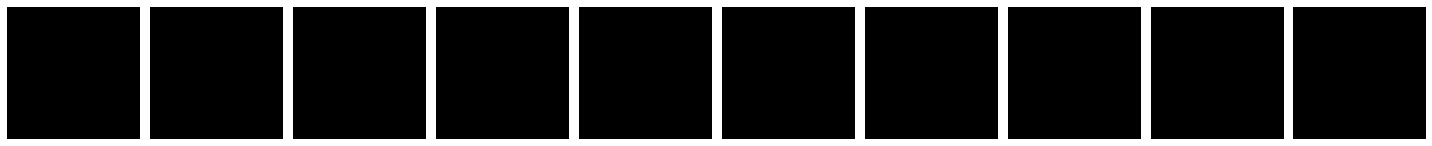

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [15]:
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

In [16]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(224,224,3))) 
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')) 

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')) 
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')) 

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')) 
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')) 
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')) 

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')) 
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')) 
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')) 

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')) 
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')) 
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [17]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [18]:
from keras.callbacks import ModelCheckpoint


checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1,monitor='val_accuracy', save_best_only=True)
history =model.fit(x=train_batches,
         steps_per_epoch=len(train_batches),
         epochs=10,
         validation_data=valid_batches,
         validation_steps=len(valid_batches),
         callbacks=[checkpointer],
         verbose=1)

Epoch 1/10
32/32 [==============================] - 3651s 114s/step - loss: 0.6967 - accuracy: 0.4953 - val_loss: 0.6939 - val_accuracy: 0.4778

Epoch 00001: val_accuracy improved from -inf to 0.47778, saving model to model.weights.best.hdf5
Epoch 2/10
32/32 [==============================] - 3659s 114s/step - loss: 0.6935 - accuracy: 0.4836 - val_loss: 0.6935 - val_accuracy: 0.4778

Epoch 00002: val_accuracy did not improve from 0.47778
Epoch 3/10
32/32 [==============================] - 3657s 114s/step - loss: 0.6933 - accuracy: 0.4963 - val_loss: 0.6935 - val_accuracy: 0.4778

Epoch 00003: val_accuracy did not improve from 0.47778
Epoch 4/10
32/32 [==============================] - 3705s 116s/step - loss: 0.6935 - accuracy: 0.4728 - val_loss: 0.6931 - val_accuracy: 0.5222

Epoch 00004: val_accuracy improved from 0.47778 to 0.52222, saving model to model.weights.best.hdf5
Epoch 5/10
32/32 [==============================] - 3659s 114s/step - loss: 0.6932 - accuracy: 0.5012 - val_loss:

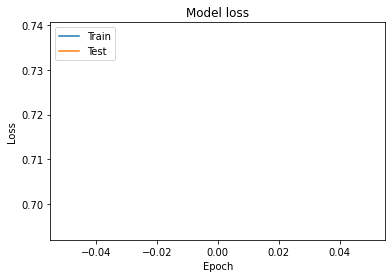

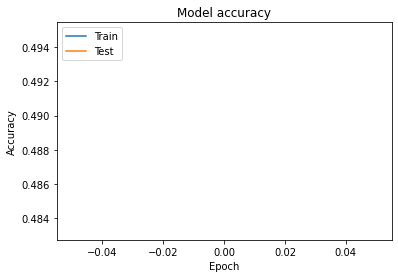

In [67]:
import matplotlib.pyplot as plt
#Loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()
#Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
from google.colab import files
files.download('/content/model.weights.best.hdf5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
len(train_batches)

32

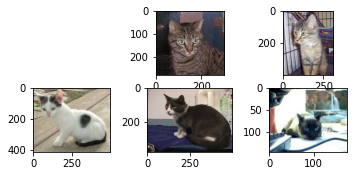

In [22]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/cat/'
# plot first few images
for i in range(1,6):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory="train", target_size=(256,256), classes=['cat', 'dog'], batch_size=32)

In [45]:
imgs=next(train_batches)[0][0]

In [46]:
imgs.shape

(224, 224, 3)

In [30]:
from PIL import Image
import numpy as np

In [77]:
imgs=next(train_batches)[0][0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


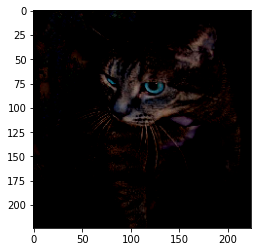

In [80]:
plt.imshow(imgs)

In [81]:
imgs

array([[[-0.10172158, -0.12462354, -0.08501961],
        [-0.32917258, -0.3559961 , -0.30854905],
        [-0.27034906, -0.3050157 , -0.23403923],
        ...,
        [-0.32132944, -0.32854512, -0.3399216 ],
        [-0.31740788, -0.32462355, -0.33600003],
        [-0.3134863 , -0.320702  , -0.33207846]],

       [[-0.19191767, -0.21481963, -0.17521569],
        [-0.30956474, -0.33638826, -0.2889412 ],
        [-0.31740788, -0.35207453, -0.28109807],
        ...,
        [-0.31740788, -0.32462355, -0.33600003],
        [-0.3134863 , -0.320702  , -0.33207846],
        [-0.30956474, -0.31678042, -0.3281569 ]],

       [[-0.20368238, -0.22658433, -0.18698041],
        [-0.25858435, -0.28540787, -0.2379608 ],
        [-0.30956474, -0.3442314 , -0.27325493],
        ...,
        [-0.3134863 , -0.320702  , -0.33207846],
        [-0.30956474, -0.31678042, -0.3281569 ],
        [-0.30564317, -0.31285885, -0.32423532]],

       ...,

       [[-0.19191767, -0.26972157, -0.30854905],
        [-0

In [55]:
img1 = np.expand_dims(imgs, axis=0)
img1.shape

(1, 224, 224, 3)

In [56]:
imgs.shape

(224, 224, 3)